In [1]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [2]:

data = pd.read_csv("Airline_Dataset.csv")

data = data.rename(columns={
    'Gender': 'Gender',
    'Customer Type': 'Customer_Type',
    'Type of Travel': 'Type_of_Travel',
    'Class': 'Class',
    'Satisfaction': 'Satisfaction',
    'id': 'ID',
    'Age': 'Age',
    'Flight Distance': 'Flight_Distance',
    'Departure/Arrival time convenient': 'Departure_Arrival_time_convenient',
    'Ease of Online booking': 'Ease_of_Online_booking',
    'Gate location': 'Gate_location',
    'Departure Delay in Minutes': 'Departure_Delay_in_Minutes',
    'Arrival Delay in Minutes': 'Arrival_Delay_in_Minutes',
    'Inflight wifi service': 'Inflight_wifi_service',
    'Food and drink': 'Food_and_drink',
    'Online boarding': 'Online_boarding',
    'Seat comfort': 'Seat_comfort',
    'Inflight entertainment': 'Inflight_entertainment',
    'On-board service': 'On_board_service',
    'Leg room service': 'Leg_room_service',
    'Baggage handling': 'Baggage_handling',
    'Checkin service': 'Checkin_service',
    'Inflight service': 'Inflight_service',
    'Cleanliness': 'Cleanliness'

})

data = data.dropna()


data['Total_Delay'] = data['Departure_Delay_in_Minutes'] + data['Arrival_Delay_in_Minutes']
data=data.drop(['Departure_Delay_in_Minutes'], axis=1)
data=data.drop(['Arrival_Delay_in_Minutes'], axis=1)

data['Satisfaction'] = data['Satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied': 1})

groundT =data['Satisfaction']
data=data.drop(['Satisfaction'], axis=1)
data=data.drop(['ID'], axis=1)

data = pd.get_dummies(data, columns=['Gender', 'Customer_Type', 'Type_of_Travel', 'Class'])

data.to_csv("donnees_nettoyees.cvs", index=False)
data.describe()


,Age,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,...,Total_Delay,Gender_Female,Gender_Male,Customer_Type_Loyal Customer,Customer_Type_disloyal Customer,Type_of_Travel_Business travel,Type_of_Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,...,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,39.428761,1190.210662,2.728544,3.057349,2.756786,2.976909,3.204685,3.252720,3.441589,3.358067,...,29.734514,0.507410,0.492590,0.816862,0.183138,0.690764,0.309236,0.478735,0.448825,0.072440
std,15.117597,997.560954,1.329235,1.526787,1.401662,1.278506,1.329905,1.350651,1.319168,1.334149,...,75.732722,0.499947,0.499947,0.386781,0.386781,0.462180,0.462180,0.499550,0.497376,0.259216
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,...,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,...,24.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,3176.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
X = data
y = groundT

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 83.63%


c:\Users\briac\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [4]:
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats
results = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1": [],
    "AUC-ROC": [],
    "Confusion Matrix": []
}
# # Définir la distribution des paramètres à échantillonner
# param_dist = {
#     'iterations': stats.randint(100, 2000),
#     'learning_rate': stats.uniform(0.01, 0.3),
#     'depth': stats.randint(6, 12),
# }

# catboost = CatBoostClassifier()

# random_search = RandomizedSearchCV(catboost, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy')
# random_search.fit(X_train, y_train)

# print("Meilleurs paramètres trouvés : ", random_search.best_params_)

# best_catboost = random_search.best_estimator_
# best_catboost.fit(X_train, y_train)

In [5]:
# from catboost import CatBoostClassifier
# from sklearn.model_selection import GridSearchCV
# catboost = CatBoostClassifier(task_type='GPU')

# param_grid = {
#     'iterations': [300, 400, 500, 600,700, 800, 900, 1000, 1100, 1200, 1300, 1400],
#     'learning_rate': [ 0.015,0.1, 0.05, 0.2, 0.25, 0.17, 0,13, 0.08, 0.03 ],
#     'depth': [8, 7, 6, 5, 4, 9, 10, 11, 12]
# }
# grid_search = GridSearchCV(catboost, param_grid, cv=2 scoring='accuracy')
# grid_search.fit(X_train, y_train)

# print("Meilleurs paramètres trouvés : ", grid_search.best_params_)
# best_catboost2 = grid_search.best_estimator_
# print (grid_search.best_estimator_)
# best_catboost2.fit(X_train, y_train)


In [6]:
best_params = {
    'depth': 8,
    'iterations': 653,
    'learning_rate': 0.05
}

best_catboost_model = CatBoostClassifier(verbose=False, **best_params)

best_catboost_model.fit(X_train, y_train)

y_pred = best_catboost_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, best_catboost_model.predict_proba(X_test)[:, 1])
cm = confusion_matrix(y_test, y_pred)

results["Model"].append("CatBoost8 (Best Parameters)")
results["Accuracy"].append(accuracy)
results["Precision"].append(precision)
results["Recall"].append(recall)
results["F1"].append(f1)
results["AUC-ROC"].append(auc_roc)
results["Confusion Matrix"].append(cm)

results_df = pd.DataFrame(results)

results_df = results_df.sort_values(by="AUC-ROC", ascending=False)

print(results_df)

                         Model  Accuracy  Precision    Recall        F1  \
0  CatBoost8 (Best Parameters)  0.964939   0.972187  0.946215  0.959025   

    AUC-ROC              Confusion Matrix  
0  0.995328  [[14364, 304], [604, 10626]]  


In [7]:
import pandas as pd
from catboost import CatBoostClassifier
from catboost import CatBoostClassifier


def predict_satisfaction(model, donnees_passager, valeurs_par_defaut=None):
    """
    Prédit la satisfaction du passager en utilisant un modèle CatBoost.

    Args:
        model (CatBoostClassifier): Le modèle CatBoost entraîné.
        donnees_passager (dict): Un dictionnaire contenant les données du passager pour faire les prédictions.
        valeurs_par_defaut (dict, optionnel): Un dictionnaire contenant les valeurs par défaut pour les données manquantes.
        # est ce que je le rajoute ou pas 

    Returns:
        int: Satisfaction prédite (0 pour non satisfait, 1 pour satisfait).
    """
    if valeurs_par_defaut is not None:
        for cle, valeur in valeurs_par_defaut.items():
            if cle not in donnees_passager:
                donnees_passager[cle] = valeur

    donnees_entree = pd.DataFrame(donnees_passager, index=[0])

    prediction = model.predict(donnees_entree)

    return prediction

donnees_passager = {}
#resultat = predict_satisfaction(best_catboost_model, donnees_passager)


In [8]:
best_catboost_model.save_model("meilleur_modele_catboost.model")

In [9]:
loaded_model = CatBoostClassifier()
loaded_model.load_model("meilleur_modele_catboost.model")

y_pred_loaded = loaded_model.predict(X_test)


C:\Users\briac\AppData\Local\Temp\ipykernel_18532\2752162182.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Age'], shade=True, color="blue")


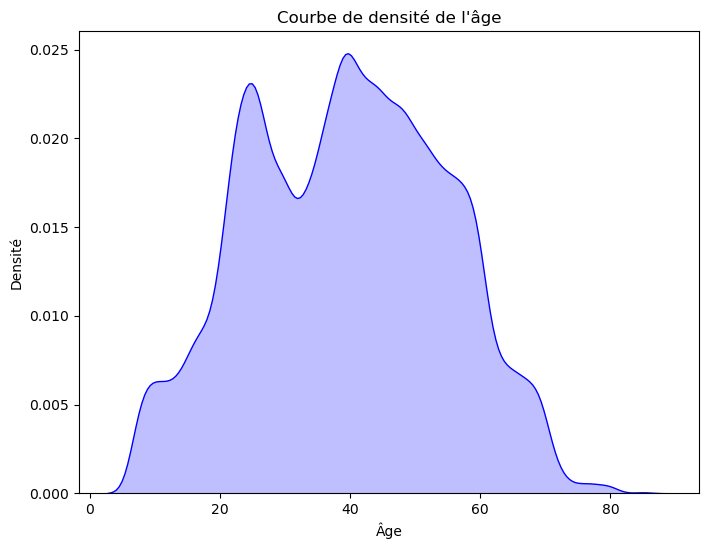

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.kdeplot(data['Age'], shade=True, color="blue")
plt.title("Courbe de densité de l'âge")
plt.xlabel("Âge")
plt.ylabel("Densité")
plt.show()


In [12]:
import pandas as pd
import plotly.express as px
data = pd.read_csv("Airline_Dataset.csv")

data = data.rename(columns={
    'Gender': 'Gender',
    'Customer Type': 'Customer_Type',
    'Type of Travel': 'Type_of_Travel',
    'Class': 'Class',
    'Satisfaction': 'Satisfaction',
    'id': 'ID',
    'Age': 'Age',
    'Flight Distance': 'Flight_Distance',
    'Departure/Arrival time convenient': 'Departure_Arrival_time_convenient',
    'Ease of Online booking': 'Ease_of_Online_booking',
    'Gate location': 'Gate_location',
    'Departure Delay in Minutes': 'Departure_Delay_in_Minutes',
    'Arrival Delay in Minutes': 'Arrival_Delay_in_Minutes',
    'Inflight wifi service': 'Inflight_wifi_service',
    'Food and drink': 'Food_and_drink',
    'Online boarding': 'Online_boarding',
    'Seat comfort': 'Seat_comfort',
    'Inflight entertainment': 'Inflight_entertainment',
    'On-board service': 'On_board_service',
    'Leg room service': 'Leg_room_service',
    'Baggage handling': 'Baggage_handling',
    'Checkin service': 'Checkin_service',
    'Inflight service': 'Inflight_service',
    'Cleanliness': 'Cleanliness'

})

data = data.dropna()


data['Total_Delay'] = data['Departure_Delay_in_Minutes'] + data['Arrival_Delay_in_Minutes']
data=data.drop(['Departure_Delay_in_Minutes'], axis=1)
data=data.drop(['Arrival_Delay_in_Minutes'], axis=1)

data['Satisfaction'] = data['Satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied': 1})

groundT =data['Satisfaction']
data=data.drop(['ID'], axis=1)

data = pd.get_dummies(data, columns=['Gender', 'Customer_Type', 'Type_of_Travel', 'Class'])

import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA


pca = PCA(n_components=3)
data_3d = pca.fit_transform(data.drop('Satisfaction', axis=1))  
data_3d_df = pd.DataFrame(data_3d, columns=['PC1', 'PC2', 'PC3'])
data_sampled = data_3d_df.sample(n=100)

data_sampled['Satisfaction'] = data['Satisfaction'].iloc[data_sampled.index].values

fig = px.scatter_3d(data_sampled, x='PC1', y='PC2', z='PC3', color='Satisfaction',
                    title='Graphique 3D interactif avec réduction de dimensionnalité (échantillon de 100 points)')

fig.show()


In [14]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Scatter3d(
        x=data_sampled['PC1'],
        y=data_sampled['PC2'],
        z=data_sampled['PC3'],
        mode='markers',
        marker=dict(
            size=5,
            color=data_sampled['Satisfaction'],  
            colorscale='Viridis',  
            opacity=0.5
        )
    )
])

fig.update_layout(
    title='Graphique de densité 3D avec réduction de dimensionnalité (échantillon de 100 points)',
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    )
)

fig.show()


In [32]:
import plotly.graph_objects as go
import numpy as np

normalized_data_sampled = data_sampled[['PC1', 'PC2', 'PC3']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

fig = go.Figure(data=[
    go.Surface(
        z=normalized_data_sampled.values,
        colorscale='Viridis',  
    )
])

fig.update_layout(
    title='Graphique de densité 3D normalisé avec réduction de dimensionnalité (échantillon de 100 points)',
    scene=dict(
        xaxis_title='Food and Drink',
        yaxis_title='Inflight Service',
        zaxis_title='Satisfaction'
    )
)

fig.show()


In [36]:
data_sampled = data[['Food_and_drink', 'Inflight_service', 'Satisfaction']].sample(n=100)

mean_data = data_sampled.groupby(['Food_and_drink', 'Inflight_service'])['Satisfaction'].mean().reset_index()


In [19]:
# import plotly.graph_objects as go


# normalized_data_sampled = data_sampled[['PC1', 'PC2', 'PC3']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))


# fig = go.Figure(data=[
#     go.Surface(
#         z=normalized_data_sampled.values,
#         colorscale='Viridis',  
#         showscale=False,  
#         type='carpet'  
#     )
# ])

# fig.update_layout(
#     title='Graphique de densité 3D en forme de "drap" normalisé avec réduction de dimensionnalité (échantillon de 100 points)',
#     scene=dict(
#         xaxis_title='PC1',
#         yaxis_title='PC2',
#         zaxis_title='PC3',
#     )
# )

# fig.show()

In [20]:
import numpy as np
from mayavi import mlab

x, y, z = np.mgrid[-5:5:100j, -5:5:100j, -5:5:100j]
data = np.sin(x * y * z) / (x * y * z)

mlab.figure()
mlab.contour3d(x, y, z, data, contours=40, opacity=0.7)
mlab.colorbar()

mlab.show()


In [23]:
import pandas as pd
import plotly.express as px
data = pd.read_csv("Airline_Dataset.csv")

data = data.rename(columns={
    'Gender': 'Gender',
    'Customer Type': 'Customer_Type',
    'Type of Travel': 'Type_of_Travel',
    'Class': 'Class',
    'Satisfaction': 'Satisfaction',
    'id': 'ID',
    'Age': 'Age',
    'Flight Distance': 'Flight_Distance',
    'Departure/Arrival time convenient': 'Departure_Arrival_time_convenient',
    'Ease of Online booking': 'Ease_of_Online_booking',
    'Gate location': 'Gate_location',
    'Departure Delay in Minutes': 'Departure_Delay_in_Minutes',
    'Arrival Delay in Minutes': 'Arrival_Delay_in_Minutes',
    'Inflight wifi service': 'Inflight_wifi_service',
    'Food and drink': 'Food_and_drink',
    'Online boarding': 'Online_boarding',
    'Seat comfort': 'Seat_comfort',
    'Inflight entertainment': 'Inflight_entertainment',
    'On-board service': 'On_board_service',
    'Leg room service': 'Leg_room_service',
    'Baggage handling': 'Baggage_handling',
    'Checkin service': 'Checkin_service',
    'Inflight service': 'Inflight_service',
    'Cleanliness': 'Cleanliness'

})

data = data.dropna()


data['Total_Delay'] = data['Departure_Delay_in_Minutes'] + data['Arrival_Delay_in_Minutes']
data=data.drop(['Departure_Delay_in_Minutes'], axis=1)
data=data.drop(['Arrival_Delay_in_Minutes'], axis=1)


In [24]:

data['Satisfaction'] = data['Satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied': 1})

groundT =data['Satisfaction']
data=data.drop(['ID'], axis=1)

data = pd.get_dummies(data, columns=['Gender', 'Customer_Type', 'Type_of_Travel', 'Class'])

In [25]:
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA
from mayavi import mlab
import numpy as np
from scipy.interpolate import griddata

pca = PCA(n_components=3)
# data_3d = pca.fit_transform(data[['Food_and_drink', 'Inflight_service', 'Flight_Distance', 'Inflight_wifi_service', 'Online_boarding', 'Age', 'Satisfaction']])
# data_3d = pca.fit_transform(data[['Inflight_wifi_service', 'Online_boarding', 'Satisfaction']])
data_3d = pca.fit_transform(data[['Food_and_drink', 'Inflight_service', 'Satisfaction']])

data_3d_df = pd.DataFrame(data_3d, columns=['PC1', 'PC2', 'PC3'])

data_sampled = data_3d_df.sample(n=100)

fig = mlab.figure(size=(800, 600), bgcolor=(1, 1, 1))

x = data_sampled['PC1'].values
y = data_sampled['PC2'].values
z = data_sampled['PC3'].values

xi, yi = np.meshgrid(xi, yi)

zi = griddata((x, y), z, (xi, yi), method='cubic')

mesh = mlab.mesh(xi, yi, zi, colormap="viridis")

mlab.colorbar(mesh, title="Valeur")

mlab.show()


In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

satisfaction_column_name = 'Satisfaction'  
if satisfaction_column_name in data_sampled.columns:
    satisfaction = data_sampled[[satisfaction_column_name]]

    data_sampled = data_sampled.drop(columns=[satisfaction_column_name])

    normalized_data_sampled = scaler.fit_transform(data_sampled)

    normalized_data_sampled = pd.DataFrame(normalized_data_sampled, columns=data_sampled.columns)
    normalized_data_sampled[satisfaction_column_name] = satisfaction

    fig = mlab.figure(size=(800, 600), bgcolor=(1, 1, 1))

    x = normalized_data_sampled['PC1'].values
    y = normalized_data_sampled['PC2'].values
    z = normalized_data_sampled['PC3'].values

    xi, yi = np.meshgrid(x, y)

    mesh = mlab.mesh(xi, yi, z, colormap="viridis")

    mlab.colorbar(mesh, title="Valeur normalisée")

    mlab.show()
else:
    print(f"La colonne '{satisfaction_column_name}' n'a pas été trouvée dans le jeu de données.")



La colonne 'Satisfaction' n'a pas été trouvée dans le jeu de données.


In [28]:
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA
from mayavi import mlab
import numpy as np
from scipy.interpolate import griddata

pca = PCA(n_components=3)
data_3d = pca.fit_transform(data[['Food_and_drink', 'Inflight_service', 'Flight_Distance', 'Inflight_wifi_service', 'Online_boarding', 'Age', 'Satisfaction']])

data_3d_df = pd.DataFrame(data_3d, columns=['PC1', 'PC2', 'PC3'])

data_sampled = data_3d_df.sample(n=100)

fig = mlab.figure(size=(800, 600), bgcolor=(1, 1, 1))

x = data_sampled['PC1'].values
y = data_sampled['PC2'].values
z = data_sampled['PC3'].values

xi, yi = np.meshgrid(x, y)
zi = griddata((x, y), z, (xi, yi), method='cubic')

mesh = mlab.mesh(xi, yi, zi, colormap="viridis")

mlab.colorbar(mesh, title="Valeur")

mlab.show()


In [29]:
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA


pca = PCA(n_components=3)
data_3d = pca.fit_transform(data[['Food_and_drink', 'Inflight_service', 'Flight_Distance', 'Inflight_wifi_service', 'Online_boarding', 'Age', 'Satisfaction']])

data_3d_df = pd.DataFrame(data_3d, columns=['PC1', 'PC2', 'PC3'])

data_sampled = data_3d_df.sample(n=100)
data_sampled['Satisfaction'] = data['Satisfaction']  
fig = px.scatter_3d(data_sampled, x='PC1', y='PC2', z='PC3', color='Satisfaction',
                    title='Graphique 3D interactif avec réduction de dimensionnalité (échantillon de 100 points)')

fig.show()
